# 1. Import and Install Dependencies

In [31]:
!pip install mediapipe

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
     #                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
      #                       mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
       #                      ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

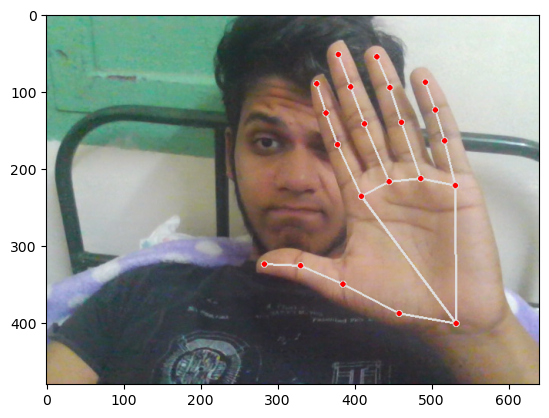

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 8.31526518e-01,  8.36496413e-01,  6.36187792e-07,  7.16411829e-01,
        8.09353113e-01, -2.70973518e-02,  6.01565063e-01,  7.29308367e-01,
       -4.42881584e-02,  5.16843557e-01,  6.80552423e-01, -6.39308169e-02,
        4.42703664e-01,  6.77056193e-01, -8.48941505e-02,  6.39427900e-01,
        4.92459148e-01, -3.59658059e-03,  5.90964198e-01,  3.53032887e-01,
       -2.75788419e-02,  5.67244232e-01,  2.68229395e-01, -5.45323119e-02,
        5.49472511e-01,  1.88832253e-01, -7.71029964e-02,  6.96454823e-01,
        4.53836113e-01, -1.92319155e-02,  6.45351768e-01,  2.97018528e-01,
       -3.80888209e-02,  6.17826045e-01,  1.97043419e-01, -6.24003485e-02,
        5.93356252e-01,  1.09070659e-01, -8.31674188e-02,  7.60924041e-01,
        4.45611060e-01, -4.18736078e-02,  7.21130431e-01,  2.92332411e-01,
       -6.27575740e-02,  6.97491229e-01,  1.99232459e-01, -7.97058791e-02,
        6.71459556e-01,  1.16661400e-01, -9.45804864e-02,  8.31206322e-01,
        4.62764055e-01, -

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 8.31526518e-01,  8.36496413e-01,  6.36187792e-07,  7.16411829e-01,
        8.09353113e-01, -2.70973518e-02,  6.01565063e-01,  7.29308367e-01,
       -4.42881584e-02,  5.16843557e-01,  6.80552423e-01, -6.39308169e-02,
        4.42703664e-01,  6.77056193e-01, -8.48941505e-02,  6.39427900e-01,
        4.92459148e-01, -3.59658059e-03,  5.90964198e-01,  3.53032887e-01,
       -2.75788419e-02,  5.67244232e-01,  2.68229395e-01, -5.45323119e-02,
        5.49472511e-01,  1.88832253e-01, -7.71029964e-02,  6.96454823e-01,
        4.53836113e-01, -1.92319155e-02,  6.45351768e-01,  2.97018528e-01,
       -3.80888209e-02,  6.17826045e-01,  1.97043419e-01, -6.24003485e-02,
        5.93356252e-01,  1.09070659e-01, -8.31674188e-02,  7.60924041e-01,
        4.45611060e-01, -4.18736078e-02,  7.21130431e-01,  2.92332411e-01,
       -6.27575740e-02,  6.97491229e-01,  1.99232459e-01, -7.97058791e-02,
        6.71459556e-01,  1.16661400e-01, -9.45804864e-02,  8.31206322e-01,
        4.62764055e-01, -

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','thanks','you','sorry','no','iloveyou','yes','Luck'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [24]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1,no_sequences+1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image) 
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'actions' is not defined

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0,
 'thanks': 1,
 'you': 2,
 'sorry': 3,
 'no': 4,
 'iloveyou': 5,
 'yes': 6,
 'Luck': 7}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(240, 30, 126)

In [31]:
np.array(labels).shape

(240,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(240, 30, 126)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(12, 8)

# 7. Build and Train LSTM Neural Network

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
# callback = tensorflow.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
8/8 [==============================] - 5s 53ms/step - loss: 2.0446 - categorical_accuracy: 0.2281
Epoch 2/1000
8/8 [==============================] - 0s 59ms/step - loss: 1.8234 - categorical_accuracy: 0.2500
Epoch 3/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.7343 - categorical_accuracy: 0.2632
Epoch 4/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.7275 - categorical_accuracy: 0.2851
Epoch 5/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.6914 - categorical_accuracy: 0.3158
Epoch 6/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.6758 - categorical_accuracy: 0.2982
Epoch 7/1000
8/8 [==============================] - 1s 78ms/step - loss: 1.6425 - categorical_accuracy: 0.3289
Epoch 8/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.5788 - categorical_accuracy: 0.3991
Epoch 9/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.5467 - categorical_accuracy: 0.3772
E

8/8 [==============================] - 1s 77ms/step - loss: 1.4050 - categorical_accuracy: 0.5789
Epoch 75/1000
8/8 [==============================] - 0s 56ms/step - loss: 1.8220 - categorical_accuracy: 0.4430
Epoch 76/1000
8/8 [==============================] - 0s 52ms/step - loss: 1.3347 - categorical_accuracy: 0.4298
Epoch 77/1000
8/8 [==============================] - 0s 53ms/step - loss: 1.3597 - categorical_accuracy: 0.4298
Epoch 78/1000
8/8 [==============================] - 0s 56ms/step - loss: 1.0288 - categorical_accuracy: 0.7325
Epoch 79/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.0491 - categorical_accuracy: 0.6053
Epoch 80/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.8730 - categorical_accuracy: 0.6842
Epoch 81/1000
8/8 [==============================] - 1s 63ms/step - loss: 0.7441 - categorical_accuracy: 0.7061
Epoch 82/1000
8/8 [==============================] - 1s 63ms/step - loss: 0.5578 - categorical_accuracy: 0.8421
Epoch 

8/8 [==============================] - 0s 44ms/step - loss: 0.0918 - categorical_accuracy: 0.9912
Epoch 147/1000
8/8 [==============================] - 0s 59ms/step - loss: 0.0719 - categorical_accuracy: 0.9825
Epoch 148/1000
8/8 [==============================] - 1s 68ms/step - loss: 0.0493 - categorical_accuracy: 0.9912
Epoch 149/1000
8/8 [==============================] - 0s 62ms/step - loss: 0.0387 - categorical_accuracy: 0.9912
Epoch 150/1000
8/8 [==============================] - 0s 62ms/step - loss: 0.0301 - categorical_accuracy: 0.9912
Epoch 151/1000
8/8 [==============================] - 0s 52ms/step - loss: 0.0216 - categorical_accuracy: 1.0000
Epoch 152/1000
8/8 [==============================] - 0s 49ms/step - loss: 0.0159 - categorical_accuracy: 1.0000
Epoch 153/1000
8/8 [==============================] - 1s 77ms/step - loss: 0.0392 - categorical_accuracy: 0.9912
Epoch 154/1000
8/8 [==============================] - 1s 76ms/step - loss: 0.0138 - categorical_accuracy: 1.000

8/8 [==============================] - 1s 82ms/step - loss: 0.2473 - categorical_accuracy: 0.9298
Epoch 219/1000
8/8 [==============================] - 1s 83ms/step - loss: 0.2066 - categorical_accuracy: 0.9386
Epoch 220/1000
8/8 [==============================] - 1s 82ms/step - loss: 0.1864 - categorical_accuracy: 0.9518
Epoch 221/1000
8/8 [==============================] - 1s 60ms/step - loss: 0.1483 - categorical_accuracy: 0.9693
Epoch 222/1000
8/8 [==============================] - 0s 51ms/step - loss: 0.4963 - categorical_accuracy: 0.9649
Epoch 223/1000
8/8 [==============================] - 0s 49ms/step - loss: 4.7604 - categorical_accuracy: 0.5702
Epoch 224/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.4179 - categorical_accuracy: 0.5307
Epoch 225/1000
8/8 [==============================] - 0s 48ms/step - loss: 1.5417 - categorical_accuracy: 0.4649
Epoch 226/1000
8/8 [==============================] - 1s 63ms/step - loss: 1.3970 - categorical_accuracy: 0.491

8/8 [==============================] - 0s 61ms/step - loss: 0.1041 - categorical_accuracy: 0.9693
Epoch 291/1000
8/8 [==============================] - 0s 60ms/step - loss: 0.0969 - categorical_accuracy: 0.9693
Epoch 292/1000
8/8 [==============================] - 0s 58ms/step - loss: 0.0848 - categorical_accuracy: 0.9693
Epoch 293/1000
8/8 [==============================] - 1s 77ms/step - loss: 0.0765 - categorical_accuracy: 0.9781
Epoch 294/1000
8/8 [==============================] - 1s 67ms/step - loss: 0.0698 - categorical_accuracy: 0.9825
Epoch 295/1000
8/8 [==============================] - 0s 46ms/step - loss: 0.0660 - categorical_accuracy: 0.9781
Epoch 296/1000
8/8 [==============================] - 1s 106ms/step - loss: 0.0628 - categorical_accuracy: 0.9825
Epoch 297/1000
8/8 [==============================] - 1s 97ms/step - loss: 0.1158 - categorical_accuracy: 0.9649
Epoch 298/1000
8/8 [==============================] - 1s 98ms/step - loss: 0.3151 - categorical_accuracy: 0.91

8/8 [==============================] - 0s 61ms/step - loss: 9.0149e-04 - categorical_accuracy: 1.0000
Epoch 363/1000
8/8 [==============================] - 0s 60ms/step - loss: 8.7211e-04 - categorical_accuracy: 1.0000
Epoch 364/1000
8/8 [==============================] - 0s 61ms/step - loss: 8.6177e-04 - categorical_accuracy: 1.0000
Epoch 365/1000
8/8 [==============================] - 1s 77ms/step - loss: 8.2792e-04 - categorical_accuracy: 1.0000
Epoch 366/1000
8/8 [==============================] - 1s 76ms/step - loss: 8.0875e-04 - categorical_accuracy: 1.0000
Epoch 367/1000
8/8 [==============================] - 1s 76ms/step - loss: 8.0313e-04 - categorical_accuracy: 1.0000
Epoch 368/1000
8/8 [==============================] - 1s 76ms/step - loss: 7.6901e-04 - categorical_accuracy: 1.0000
Epoch 369/1000
8/8 [==============================] - 1s 76ms/step - loss: 7.4985e-04 - categorical_accuracy: 1.0000
Epoch 370/1000
8/8 [==============================] - 1s 70ms/step - loss: 7.58

8/8 [==============================] - 1s 77ms/step - loss: 2.2532e-04 - categorical_accuracy: 1.0000
Epoch 433/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.2452e-04 - categorical_accuracy: 1.0000
Epoch 434/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1979e-04 - categorical_accuracy: 1.0000
Epoch 435/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1796e-04 - categorical_accuracy: 1.0000
Epoch 436/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1475e-04 - categorical_accuracy: 1.0000
Epoch 437/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.0967e-04 - categorical_accuracy: 1.0000
Epoch 438/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.0956e-04 - categorical_accuracy: 1.0000
Epoch 439/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.0638e-04 - categorical_accuracy: 1.0000
Epoch 440/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.03

8/8 [==============================] - 0s 46ms/step - loss: 9.1866e-05 - categorical_accuracy: 1.0000
Epoch 503/1000
8/8 [==============================] - 0s 47ms/step - loss: 9.0011e-05 - categorical_accuracy: 1.0000
Epoch 504/1000
8/8 [==============================] - 0s 50ms/step - loss: 8.8717e-05 - categorical_accuracy: 1.0000
Epoch 505/1000
8/8 [==============================] - 0s 52ms/step - loss: 8.9724e-05 - categorical_accuracy: 1.0000
Epoch 506/1000
8/8 [==============================] - 1s 79ms/step - loss: 8.7558e-05 - categorical_accuracy: 1.0000
Epoch 507/1000
8/8 [==============================] - 1s 80ms/step - loss: 8.6975e-05 - categorical_accuracy: 1.0000
Epoch 508/1000
8/8 [==============================] - 1s 63ms/step - loss: 8.6905e-05 - categorical_accuracy: 1.0000
Epoch 509/1000
8/8 [==============================] - 1s 103ms/step - loss: 8.6214e-05 - categorical_accuracy: 1.0000
Epoch 510/1000
8/8 [==============================] - 0s 44ms/step - loss: 8.3

8/8 [==============================] - 1s 76ms/step - loss: 5.1698e-05 - categorical_accuracy: 1.0000
Epoch 573/1000
8/8 [==============================] - 1s 76ms/step - loss: 4.5501e-05 - categorical_accuracy: 1.0000
Epoch 574/1000
8/8 [==============================] - 1s 76ms/step - loss: 4.1143e-05 - categorical_accuracy: 1.0000
Epoch 575/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2607e-04 - categorical_accuracy: 1.0000
Epoch 576/1000
8/8 [==============================] - 1s 75ms/step - loss: 5.2992e-05 - categorical_accuracy: 1.0000
Epoch 577/1000
8/8 [==============================] - 1s 76ms/step - loss: 4.5513e-05 - categorical_accuracy: 1.0000
Epoch 578/1000
8/8 [==============================] - 1s 76ms/step - loss: 5.3797e-05 - categorical_accuracy: 1.0000
Epoch 579/1000
8/8 [==============================] - 1s 75ms/step - loss: 4.2698e-05 - categorical_accuracy: 1.0000
Epoch 580/1000
8/8 [==============================] - 1s 76ms/step - loss: 3.85

8/8 [==============================] - 1s 75ms/step - loss: 2.2047e-05 - categorical_accuracy: 1.0000
Epoch 643/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1842e-05 - categorical_accuracy: 1.0000
Epoch 644/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1782e-05 - categorical_accuracy: 1.0000
Epoch 645/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.1634e-05 - categorical_accuracy: 1.0000
Epoch 646/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.1395e-05 - categorical_accuracy: 1.0000
Epoch 647/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1252e-05 - categorical_accuracy: 1.0000
Epoch 648/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1115e-05 - categorical_accuracy: 1.0000
Epoch 649/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.0917e-05 - categorical_accuracy: 1.0000
Epoch 650/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.07

8/8 [==============================] - 1s 76ms/step - loss: 1.2595e-05 - categorical_accuracy: 1.0000
Epoch 713/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2416e-05 - categorical_accuracy: 1.0000
Epoch 714/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2391e-05 - categorical_accuracy: 1.0000
Epoch 715/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2277e-05 - categorical_accuracy: 1.0000
Epoch 716/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2150e-05 - categorical_accuracy: 1.0000
Epoch 717/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.2071e-05 - categorical_accuracy: 1.0000
Epoch 718/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.2033e-05 - categorical_accuracy: 1.0000
Epoch 719/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.1955e-05 - categorical_accuracy: 1.0000
Epoch 720/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.18

8/8 [==============================] - 1s 95ms/step - loss: 7.6556e-06 - categorical_accuracy: 1.0000
Epoch 783/1000
8/8 [==============================] - 1s 94ms/step - loss: 7.5719e-06 - categorical_accuracy: 1.0000
Epoch 784/1000
8/8 [==============================] - 1s 94ms/step - loss: 7.5076e-06 - categorical_accuracy: 1.0000
Epoch 785/1000
8/8 [==============================] - 1s 94ms/step - loss: 7.4940e-06 - categorical_accuracy: 1.0000
Epoch 786/1000
8/8 [==============================] - 1s 96ms/step - loss: 7.3999e-06 - categorical_accuracy: 1.0000
Epoch 787/1000
8/8 [==============================] - 1s 95ms/step - loss: 7.3497e-06 - categorical_accuracy: 1.0000
Epoch 788/1000
8/8 [==============================] - 1s 66ms/step - loss: 7.3189e-06 - categorical_accuracy: 1.0000
Epoch 789/1000
8/8 [==============================] - 0s 41ms/step - loss: 7.2854e-06 - categorical_accuracy: 1.0000
Epoch 790/1000
8/8 [==============================] - 1s 72ms/step - loss: 7.25

8/8 [==============================] - 1s 76ms/step - loss: 0.6634 - categorical_accuracy: 0.7456
Epoch 853/1000
8/8 [==============================] - 1s 76ms/step - loss: 0.5844 - categorical_accuracy: 0.8246
Epoch 854/1000
8/8 [==============================] - 1s 76ms/step - loss: 0.4732 - categorical_accuracy: 0.8289
Epoch 855/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.8519 - categorical_accuracy: 0.7500
Epoch 856/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.0206 - categorical_accuracy: 0.6009
Epoch 857/1000
8/8 [==============================] - 1s 75ms/step - loss: 0.8729 - categorical_accuracy: 0.6974
Epoch 858/1000
8/8 [==============================] - 1s 76ms/step - loss: 0.7511 - categorical_accuracy: 0.8289
Epoch 859/1000
8/8 [==============================] - 1s 75ms/step - loss: 0.6179 - categorical_accuracy: 0.7851
Epoch 860/1000
8/8 [==============================] - 1s 76ms/step - loss: 0.5674 - categorical_accuracy: 0.807

8/8 [==============================] - 1s 100ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 925/1000
8/8 [==============================] - 1s 100ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 926/1000
8/8 [==============================] - 1s 97ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 927/1000
8/8 [==============================] - 1s 88ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 928/1000
8/8 [==============================] - 1s 88ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 929/1000
8/8 [==============================] - 1s 89ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 930/1000
8/8 [==============================] - 1s 87ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 931/1000
8/8 [==============================] - 1s 89ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 932/1000
8/8 [==============================] - 1s 90ms/step - loss: 0.0013 - categorical_accuracy: 1.0

8/8 [==============================] - 1s 90ms/step - loss: 9.3637e-05 - categorical_accuracy: 1.0000
Epoch 995/1000
8/8 [==============================] - 1s 87ms/step - loss: 9.1267e-05 - categorical_accuracy: 1.0000
Epoch 996/1000
8/8 [==============================] - 1s 94ms/step - loss: 8.9196e-05 - categorical_accuracy: 1.0000
Epoch 997/1000
8/8 [==============================] - 1s 88ms/step - loss: 8.7167e-05 - categorical_accuracy: 1.0000
Epoch 998/1000
8/8 [==============================] - 1s 87ms/step - loss: 8.5685e-05 - categorical_accuracy: 1.0000
Epoch 999/1000
8/8 [==============================] - 1s 87ms/step - loss: 8.3804e-05 - categorical_accuracy: 1.0000
Epoch 1000/1000
8/8 [==============================] - 1s 89ms/step - loss: 8.2145e-05 - categorical_accuracy: 1.0000


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 203,624
Trainable params: 203,624
Non-trai

# 8. Make Predictions

In [44]:
res = model.predict(X_test)

1/1 [==============================] - 1s 661ms/step


In [45]:
actions[np.argmax(res[3])]

'hello'

In [46]:
actions[np.argmax(y_test[3])]

'hello'

# 9. Save Weights

In [47]:
model.save('action.h5')

In [48]:
#del model

In [49]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 51ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 1,  1]],

       [[10,  0],
        [ 0,  2]],

       [[11,  0],
        [ 0,  1]],

       [[10,  0],
        [ 0,  2]],

       [[11,  1],
        [ 0,  0]],

       [[11,  0],
        [ 0,  1]],

       [[ 8,  0],
        [ 0,  4]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.9166666666666666

# 11. Test in Real Time

In [55]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions=[]
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
you
<class 'mediapipe.python.s

1/1 [==============================] - 0s 49ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
thanks
<class 'media

1/1 [==============================] - 0s 49ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'media

1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 38ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
yes
<class 'mediapipe.python.solution_base.S